# **Hubbard triangle**

## CMS Project - TU WIEN
#### Alexander Wurm
#### alexander.wurm@tuwien.ac.at

In [1]:
from config import *
from functions import *

![title](task.png)

In [2]:
# generate states
states = generate_states(N_electrons)

# generate Hamiltonian
Hamiltonian = generate_Hamiltonian(states)

# generate Sz matrix
S = calc_S(states)

In [3]:
printM(states)

⎡0  0  0  0  1  1⎤
⎢                ⎥
⎢0  0  0  1  0  1⎥
⎢                ⎥
⎢0  0  0  1  1  0⎥
⎢                ⎥
⎢0  0  1  0  0  1⎥
⎢                ⎥
⎢0  0  1  0  1  0⎥
⎢                ⎥
⎢0  0  1  1  0  0⎥
⎢                ⎥
⎢0  1  0  0  0  1⎥
⎢                ⎥
⎢0  1  0  0  1  0⎥
⎢                ⎥
⎢0  1  0  1  0  0⎥
⎢                ⎥
⎢0  1  1  0  0  0⎥
⎢                ⎥
⎢1  0  0  0  0  1⎥
⎢                ⎥
⎢1  0  0  0  1  0⎥
⎢                ⎥
⎢1  0  0  1  0  0⎥
⎢                ⎥
⎢1  0  1  0  0  0⎥
⎢                ⎥
⎣1  1  0  0  0  0⎦

In [4]:
# print Hamiltonian matrix
printM(Hamiltonian)

⎡0.0   -1.0  1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0 ⎤
⎢                                                                                        ⎥
⎢-1.0  0.0   -1.0  0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0 ⎥
⎢                                                                                        ⎥
⎢1.0   -1.0  0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0 ⎥
⎢                                                                                        ⎥
⎢0.0   0.0   0.0   4.0   -1.0  -1.0  -1.0  0.0   0.0   0.0   -1.0  0.0   0.0   0.0   0.0 ⎥
⎢                                                                                        ⎥
⎢0.0   0.0   0.0   -1.0  0.0   -1.0  0.0   -1.0  0.0   0.0   0.0   -1.0  0.0   0.0   0.0 ⎥
⎢                                                                                        ⎥
⎢0.0   0.0   0.0   -1.0  -1.0  0.0   0.0   0.0   -1.0  0.0   0.0   0.0   -1.0  0.0   0.0 ⎥

In [5]:
# print S matrix
printM(S)

⎡0.333333333333333         0.0                0.0         0.0         0.0                 0.0                 0.0          0.0         0.0     
⎢                                                                                                                                              
⎢       0.0         0.333333333333333         0.0         0.0         0.0                 0.0                 0.0          0.0         0.0     
⎢                                                                                                                                              
⎢       0.0                0.0         0.333333333333333  0.0         0.0                 0.0                 0.0          0.0         0.0     
⎢                                                                                                                                              
⎢       0.0                0.0                0.0         0.0         0.0                 0.0                 0.0          0.0         0

In [6]:
# show that [H, Sz] = 0
printM(Hamiltonian*S - S*Hamiltonian)

⎡0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0⎤
⎢                                                                         ⎥
⎢0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0⎥
⎢                                                                         ⎥
⎢0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0⎥
⎢                                                                         ⎥
⎢0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0⎥
⎢                                                                         ⎥
⎢0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0⎥
⎢                                                                         ⎥
⎢0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0⎥
⎢                                                                         ⎥
⎢0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0⎥
⎢           

**Berechne S vs. U** für U = 1.0 ... 4.0:

In [7]:
U = np.arange(1, 10.1, 0.1)
SUi = []

for Ui in U:            
    # find ground state
    Hamiltonian = generate_Hamiltonian(states, Ui)
    eigval, eigvec = np.linalg.eig(Hamiltonian)       
    eigval_min = np.min(eigval)    
    
    #printM(np.sort(eigval))

    # average over all ground states (Entartung)
    cnt = 0
    su_avg = 0

    for i in range(len(eigval)):
        if abs(eigval_min-eigval[i]) < 1e-4:
            #print(i, eigval[i])
            cnt += 1
            su_avg = 0
            #print(i, eigvec[:,i])
            for k,x in enumerate(eigvec[:,i]):            
                """
                res1 = up(states[k])[0] - down(states[k])[0]
                res2 = up(states[k])[1] - down(states[k])[1]
                res3 = up(states[k])[2] - down(states[k])[2]
                su_avg += x**2 * (res1*res2 + res2*res3 + res3*res1) / NSITES
                """
                su_avg += eigvec[:,i]@S@eigvec[:,i] / NSITES

            #print("---")
    print(cnt)
    SUi.append(su_avg/cnt)    
#print((2/6)*(2/6))

1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


In [8]:
A = np.array([ 0.57735027, -0.57735027,  0.57735027,  0.,          0.,          0.,
  0.,          0.,          0.,          0.,          0.,          0.,
  0.,          0.,          0.,        ])

B = np.array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  1.47275595e-16,
  2.66418202e-01, -2.66418202e-01, -2.66418202e-01,  3.27264454e-16,
  2.66418202e-01, -4.37465446e-01,  2.66418202e-01, -2.66418202e-01,
 -2.31613959e-16,  4.37465446e-01, -4.37465446e-01])

C = np.array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -1.54002030e-16,
 -2.78586170e-01,  2.78586170e-01,  2.78586170e-01, -4.64136100e-16,
 -2.78586170e-01, -4.22034152e-01, -2.78586170e-01,  2.78586170e-01,
  3.91364980e-16,  4.22034152e-01, -4.22034152e-01])

print(A@S@A)
print(B@S@B)
print(C@S@C)

print( (A@S@A + B@S@B + C@S@C)/3)

0.33333333426907297
0.04941869973015331
0.022892317223821297
0.13521478374101586


/home/alexander/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/home/alexander/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


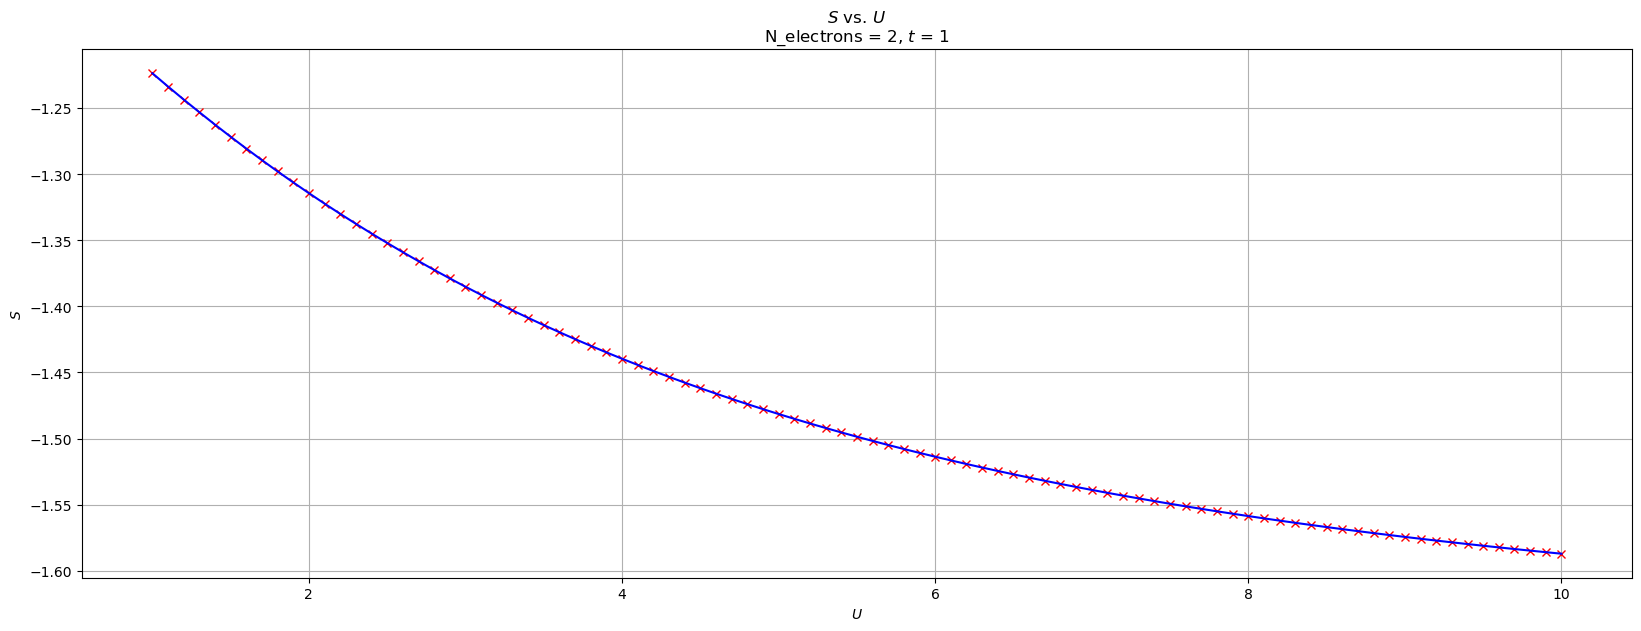

In [9]:
plt.rcParams['figure.figsize'] = [20, 7]
plt.rcParams['figure.dpi'] = 100
plt.plot(U, SUi, 'rx')
plt.plot(U, SUi, 'b')
plt.grid()
plt.xlabel("$U$")
plt.ylabel(r"$S$")
plt.title(r"$S$ vs. $U$" "\n" "N_electrons = {:g}, $t$ = {:g}" .format(N_electrons, t))
plt.savefig('plot_SUi_N'+str(N_electrons)+'_t'+str(t)+'.pdf')

**Berechne < S > vs. T** für T = 0.01 ... 1.0:

In [10]:
T = np.arange(0.01, 1.1, 0.01)
STi = []

cnt = 0

for Ti in T:        
    n_elem = []
    eigval_all = np.array([])
    beta = 1/Ti
    
    # find ground state
    Hamiltonian = generate_Hamiltonian(states, Ui=1)
    eigval, eigvec = np.linalg.eig(Hamiltonian)       
    eigval_min = np.min(eigval)
      
    eigval_all = np.append(eigval_all, eigval)

    st_avg = 0

    for i in range(len(eigval)):
        st_avg = 0
        for k,x in enumerate(eigvec[:,i]):            
            res1 = up(states[k])[0] - down(states[k])[0]
            res2 = up(states[k])[1] - down(states[k])[1]
            res3 = up(states[k])[2] - down(states[k])[2]
            st_avg += x**2 * (res1*res2 + res2*res3 + res3*res1) / NSITES
        
        n_elem.append((st_avg, eigval[i]))
        
    n_avg = Avg2(n_elem, beta, eigval_all, eigval_min)  
    STi.append(n_avg)

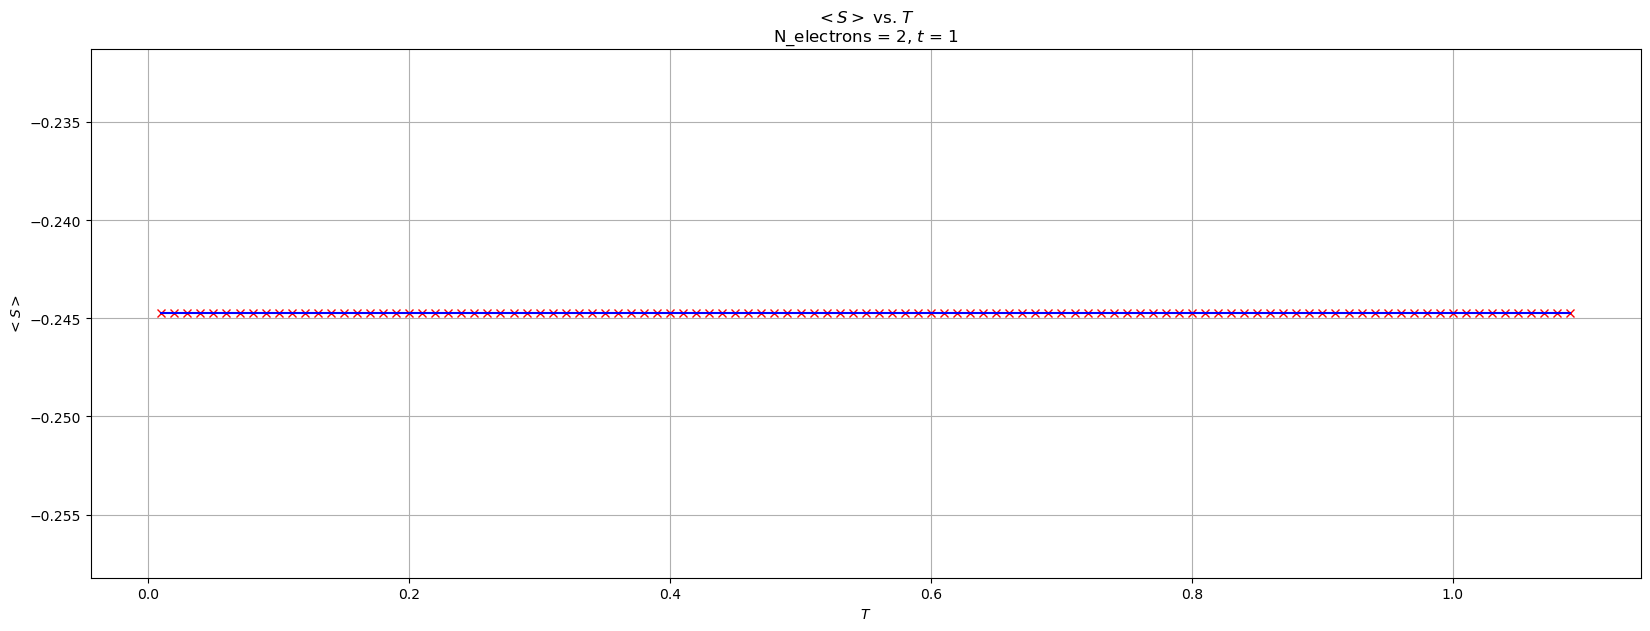

In [11]:
plt.rcParams['figure.figsize'] = [20, 7]
plt.rcParams['figure.dpi'] = 100
plt.plot(T, STi, 'rx')
plt.plot(T, STi, 'b')
plt.grid()
plt.xlabel("$T$")
plt.ylabel(r"$<S>$")
plt.title(r"$<S>$ vs. $T$" "\n" "N_electrons = {:g}, $t$ = {:g}" .format(N_electrons, t))
plt.savefig('plot_STi_N'+str(N_electrons)+'_t'+str(t)+'.pdf')

**Berechne d vs. U** für U = 1.0 ... 4.0:

In [12]:
U = np.arange(1, 10.1, 0.1)
dUi = []

for Ui in U:            
    # find ground state
    Hamiltonian = generate_Hamiltonian(states, Ui)
    eigval, eigvec = np.linalg.eig(Hamiltonian)       
    eigval_min = np.min(eigval)

    # average over all ground states (Entartung)
    cnt = 0
    du_avg = 0

    for i in range(len(eigval)):
        if abs(eigval_min-eigval[i]) < 1e-10:
            cnt += 1
            du_avg = 0
            for k,x in enumerate(eigvec[:,i]):            
                res1 = up(states[k])[0] * down(states[k])[0]
                res2 = up(states[k])[1] * down(states[k])[1]
                res3 = up(states[k])[2] * down(states[k])[2]
                du_avg += x**2 * (res1 + res2 + res3) / NSITES
                
    dUi.append(du_avg/cnt)

/home/alexander/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/home/alexander/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


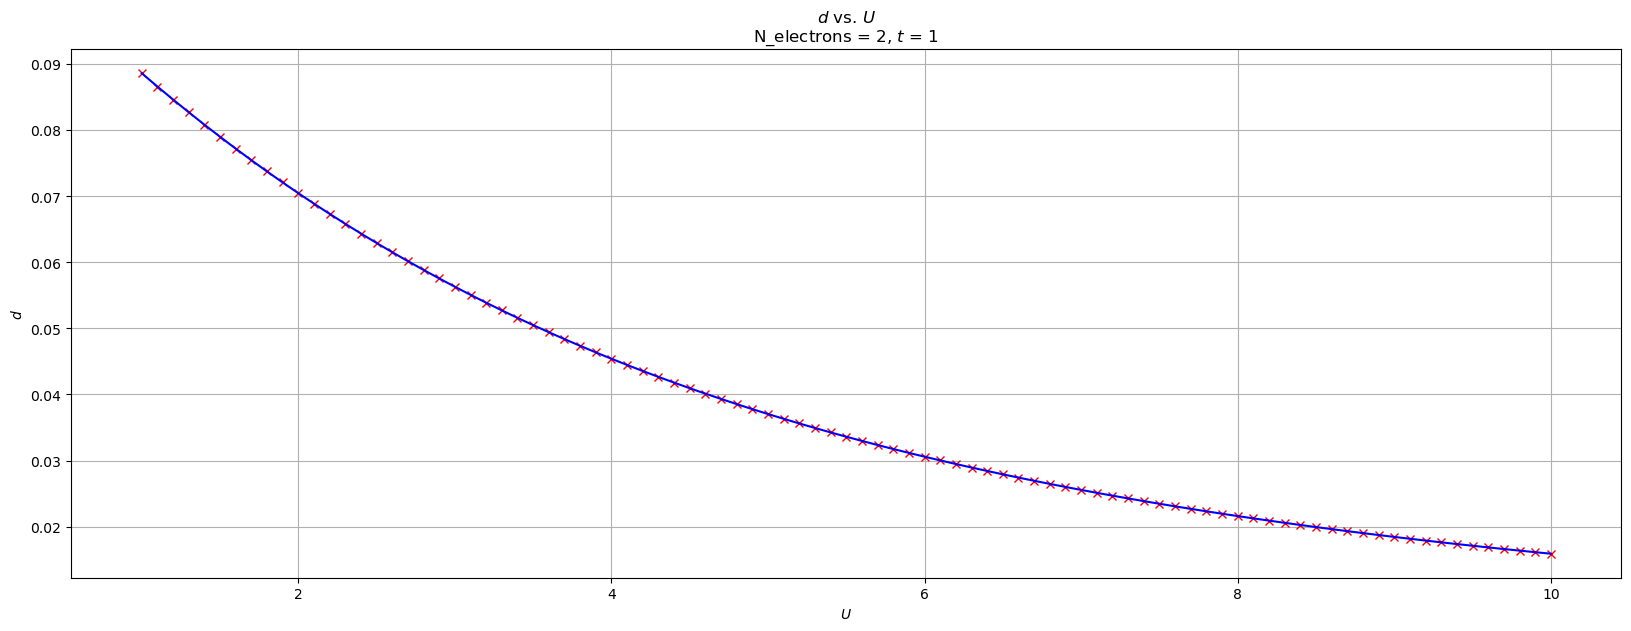

In [13]:
plt.rcParams['figure.figsize'] = [20, 7]
plt.rcParams['figure.dpi'] = 100
plt.plot(U, dUi, 'rx')
plt.plot(U, dUi, 'b')
plt.grid()
plt.xlabel("$U$")
plt.ylabel(r"$d$")
plt.title(r"$d$ vs. $U$" "\n" "N_electrons = {:g}, $t$ = {:g}" .format(N_electrons, t))
plt.savefig('plot_dUi_N'+str(N_electrons)+'_t'+str(t)+'.pdf')

/home/alexander/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


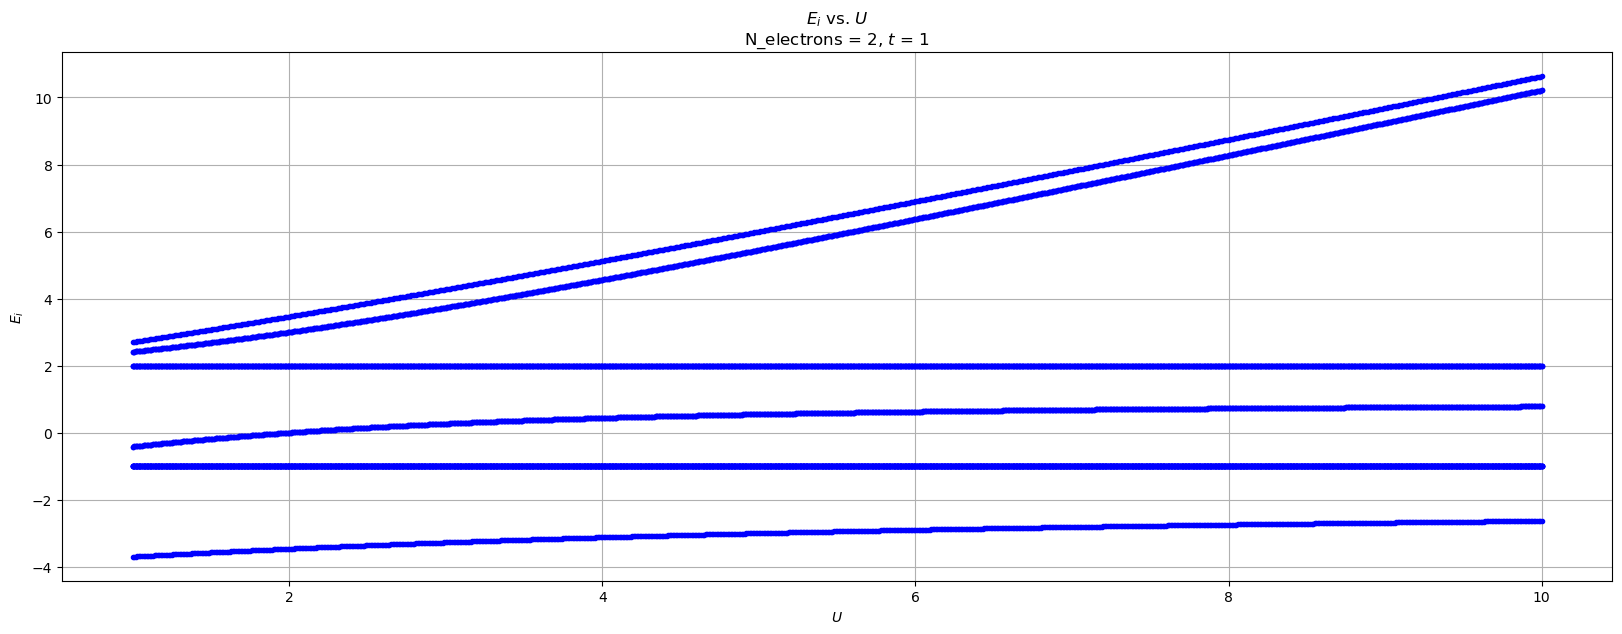

In [14]:
U = np.arange(1, 10.01, 0.01)
Ei = []

for Ui in U:            
    # find ground state
    Hamiltonian = generate_Hamiltonian(states, Ui)
    eigval, eigvec = np.linalg.eig(Hamiltonian)       
    eigval_min = np.min(eigval)
    
    Ei.append((Ui, eigval))
    
i, j, x = 0, 0, 0
for i, x in Ei:
    for j in x:
        plt.plot(i,j, 'b.')

plt.rcParams['figure.figsize'] = [20, 7]
plt.rcParams['figure.dpi'] = 100
plt.grid()
plt.xlabel("$U$")
plt.ylabel(r"$E_i$")
plt.title(r"$E_i$ vs. $U$" "\n" "N_electrons = {:g}, $t$ = {:g}" .format(N_electrons, t))
plt.savefig('plot_EiUi_N'+str(N_electrons)+'_t'+str(t)+'.pdf')

In [23]:
A = np.matrix.conjugate(Hamiltonian)
AT = Hamiltonian.T
assert (AT == A) is not False